In [67]:
## Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)  # Loads the dataset and splits it into training (60,000 images) and testing (10,000 images)

(60000, 28, 28) (10000, 28, 28)


In [68]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
## Displays the Shapes of the Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)


In [70]:
## Data Preporocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0 # Converts the Integers to Floats

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1) # Reshapes the Input data for CNN

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10) # One-hot Encodes the Labels


In [71]:
## Split the data into training (54,000 images) and validation (6,000 images)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=36)

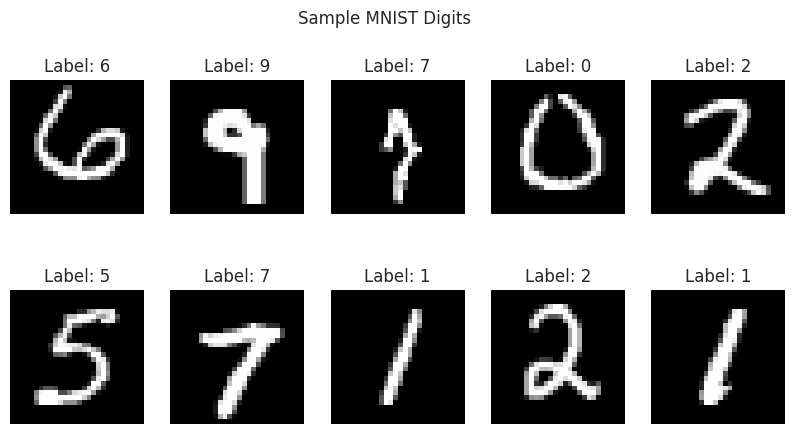

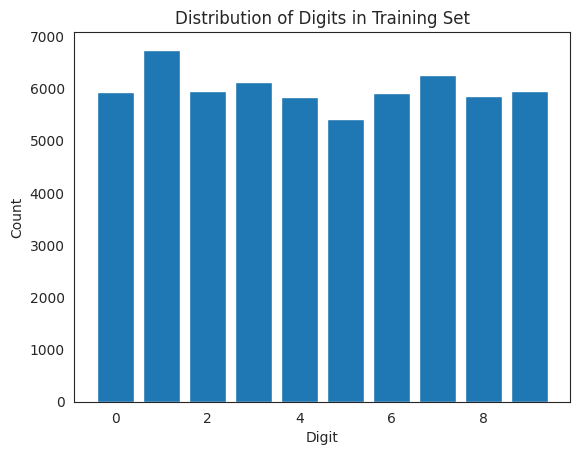

In [72]:
## EDA
#Display the first ten images from dataset in greyscale 28x28
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

# Plot bar chart displaying dataset balance
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [73]:
## Building the first model
model_1 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8780 - loss: 0.4481 - val_accuracy: 0.9720 - val_loss: 0.1011
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9781 - loss: 0.0767 - val_accuracy: 0.9783 - val_loss: 0.0725
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9823 - val_loss: 0.0566
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9855 - val_loss: 0.0503
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9927 - loss: 0.0253 - val_accuracy: 0.9835 - val_loss: 0.0490


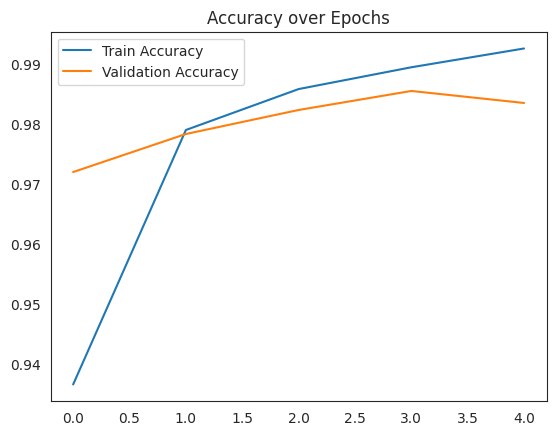

In [74]:
## Plotting the training curve of the first model
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [75]:
## Building the second model
model_2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/10


422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.7857 - loss: 0.6747 - val_accuracy: 0.9738 - val_loss: 0.0850
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.9662 - loss: 0.1115 - val_accuracy: 0.9810 - val_loss: 0.0553
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - accuracy: 0.9771 - loss: 0.0784 - val_accuracy: 0.9860 - val_loss: 0.0427
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9818 - loss: 0.0620 - val_accuracy: 0.9865 - val_loss: 0.0401
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9854 - loss: 0.0491 - val_accuracy: 0.9883 - val_loss: 0.0381
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9871 - loss: 0.0442 - val_accuracy: 0.9903 - val_loss: 0.0320
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 34ms/step - accuracy: 0.9881 - loss: 0.0394 - val_accuracy: 0.9902 - val_loss: 0.0347
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accurac

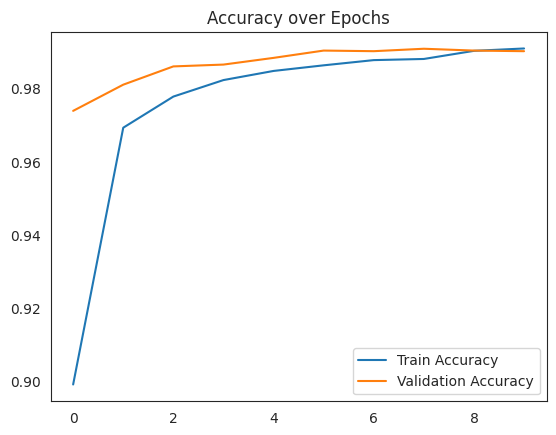

In [76]:
## Plotting the training curve of the second model
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [78]:
## Building the third model
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_3 = model_3.fit(X_train, y_train_cat, epochs=12, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/12


/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.8710 - loss: 0.4799 - val_accuracy: 0.9162 - val_loss: 0.2546
Epoch 2/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 42s 73ms/step - accuracy: 0.9769 - loss: 0.0779 - val_accuracy: 0.9887 - val_loss: 0.0392
Epoch 3/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9840 - loss: 0.0534 - val_accuracy: 0.9887 - val_loss: 0.0374
Epoch 4/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9872 - loss: 0.0436 - val_accuracy: 0.9905 - val_loss: 0.0353
Epoch 5/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 72ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9855 - val_loss: 0.0584
Epoch 6/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9904 - loss: 0.0309 - val_accuracy: 0.9882 - val_loss: 0.0469
Epoch 7/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9887 - val_loss: 0.0409
Epoch 8/12
422/422 ━━━━━━━━━━━━━━━━━━━━ 43s 73ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accurac

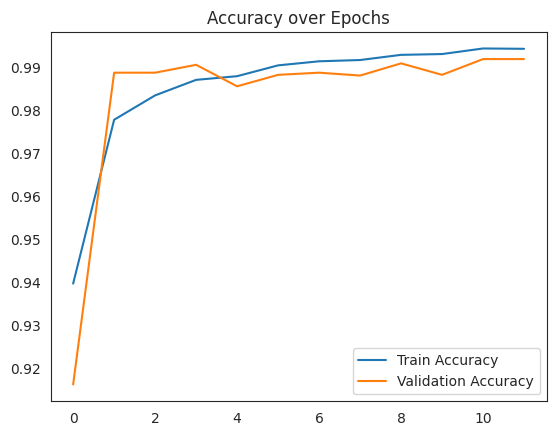

In [79]:
## Plotting the training curve of the third model
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()